### Loan Application Status Predictor using Support Vector machine model

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#### Data Collection and Processing

In [13]:
#loading Dataset to Pandas DF

loan_df = pd.read_csv('LoanPredictor.csv')

In [19]:
loan_df.head()
loan_df.shape

(614, 13)

In [17]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
#Drop Missing Values
loan_df = loan_df.dropna()

In [29]:
loan_df.shape

(480, 13)

In [30]:
#Label Encoding
loan_df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_24832\4068717186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [31]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [33]:
loan_df.replace(to_replace='3+', value=4,inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_24832\316500421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.replace(to_replace='3+', value=4,inplace=True)


In [69]:
loan_df.dtypes

Married                      int64
Dependents                   int32
Graduate                     int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Gender_Female                uint8
Gender_Male                  uint8
dtype: object

In [40]:
loan_df['Dependents'] = loan_df['Dependents'].astype('int')

C:\Users\shubh\AppData\Local\Temp\ipykernel_24832\2471560548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['Dependents'] = loan_df['Dependents'].astype('int')


In [42]:
#Label Encoding
loan_df.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_24832\202568439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)


In [49]:
loan_df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [58]:
loan_df['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [60]:
loan_df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [47]:
loan_df.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_24832\2737393593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)


In [50]:
loan_df.replace({"Married":{'No':0,'Yes':1}},inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_24832\616209909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.replace({"Married":{'No':0,'Yes':1}},inplace=True)


In [64]:
loan_df.replace({"Property_Area":{0:'Rural',1:'Semiurban',2:'Urban'}},inplace=True)

In [68]:
loan_df=pd.get_dummies(loan_df, columns = ['Property_Area', 'Gender'])

In [52]:
loan_df =loan_df.rename(columns={'Education':'Graduate'})

In [55]:
loan_df.drop('Loan_ID', axis=1, inplace=True)

In [70]:
loan_df

,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1
2,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,0,1
3,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,0,1
4,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,1
5,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1,0,0,1,0
610,1,4,1,0,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,0,1,0,1
612,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,1


### Data Visualization

<Axes: xlabel='Graduate', ylabel='count'>

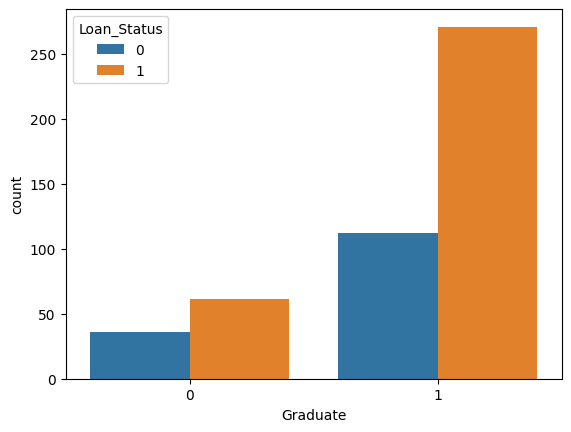

In [57]:
sns.countplot(x='Graduate',hue='Loan_Status',data=loan_df)

<Axes: xlabel='Married', ylabel='count'>

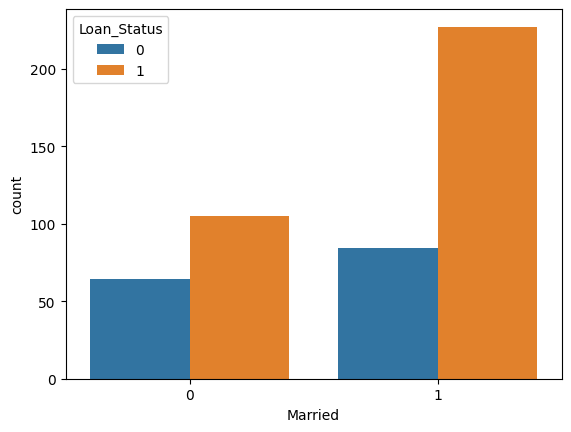

In [59]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_df)

In [76]:
#Creating X and Y

X= loan_df.drop(columns='Loan_Status',axis=1)
y = loan_df['Loan_Status']

In [78]:
# Split Train Test data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5434)

In [81]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(408, 14) (72, 14) (408,) (72,)


In [98]:
#Training the SVM model
clf = svm.SVC(kernel='linear')

In [99]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [100]:
pred_x= clf.predict(X_test)

In [102]:
test_acc = accuracy_score(pred_x,y_test)
print(test_acc)

0.7916666666666666


In [103]:
import pickle
pickle.dump(clf,open('regmodel.pkl','wb'))